In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from decimal import *

dft = pd.read_csv('PA1_train.csv')
df_train = dft.drop('id', 1)
dfd = pd.read_csv('PA1_dev.csv')
df_dev = dfd.drop('id', 1)
df_train['year'] = pd.DatetimeIndex(df_train['date']).year
df_train['month'] = pd.DatetimeIndex(df_train['date']).month
df_train['day'] = pd.DatetimeIndex(df_train['date']).day
df_dev['year'] = pd.DatetimeIndex(df_dev['date']).year
df_dev['month'] = pd.DatetimeIndex(df_dev['date']).month
df_dev['day'] = pd.DatetimeIndex(df_dev['date']).day

df_train.head()

,dummy,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month,day
0,1,7/9/2014,4,2.50,2720,10006,2.0,0,0,3,...,0,98074,47.6295,-122.042,2720,10759,5.9495,2014,7,9
1,1,7/18/2014,2,2.50,2600,5000,1.0,0,0,5,...,0,98126,47.5806,-122.379,2260,5000,6.6500,2014,7,18
2,1,7/7/2014,5,1.75,1650,3000,1.5,0,0,3,...,0,98144,47.5955,-122.306,1740,4000,4.4300,2014,7,7
3,1,4/28/2015,4,1.75,1720,9600,1.0,0,0,4,...,0,98059,47.4764,-122.155,1660,10720,3.8000,2015,4,28
4,1,9/4/2014,6,2.25,3830,11180,1.0,0,2,5,...,0,98008,47.5849,-122.113,2500,10400,8.8700,2014,9,4


In [6]:
df_train = df_train.drop('date', 1)
df_dev = df_dev.drop('date', 1)

df_train_target = df_train['price']
df_dev_target = df_dev['price']

df_train_trial = df_train.drop('price', 1)
df_dev_trial = df_dev.drop('price', 1)


df_columns = df_train.columns.values
list_columns = df_columns.tolist()

df_cate_col = ['waterfront', 'grade', 'condition', 'zipcode'] 
print(list_columns)


['dummy', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'year', 'month', 'day']


In [7]:
for i in df_cate_col:
  list_columns.remove(i)

df_num_col = np.asarray(list_columns)
list_columns.remove('price')
df_num_col_wo_price = np.asarray(list_columns)


df_train_target = df_train['price']
df_dev_target = df_dev['price']

df_train_trial = df_train[df_num_col_wo_price];
df_dev_trial = df_dev[df_num_col_wo_price]

for i in range(len(df_cate_col)):
  a = pd.get_dummies(df_train[df_cate_col[i]], prefix=df_cate_col[i])
  df_train_trial = pd.concat([df_train_trial, a], axis=1)
qq = np.zeros(df_train.shape[0])
df_train_trial.insert(20, column='grade_3', value=qq)

df_train_trial.head()
df_dev_trial.head()


,dummy,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,1,3,2.25,2570,7242,2.0,0,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
1,1,3,2.00,1680,8080,1.0,0,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18
2,1,3,2.50,3560,9796,1.0,0,1860,1700,1965,0,47.6007,-122.145,2210,8925,2015,4,3
3,1,2,1.00,1160,6000,1.0,0,860,300,1942,0,47.6900,-122.292,1330,6000,2014,5,27
4,1,3,2.00,1890,14040,2.0,0,1890,0,1994,0,47.7277,-121.962,1890,14018,2014,7,31


In [8]:
for i in range(len(df_cate_col)):
  a = pd.get_dummies(df_dev[df_cate_col[i]], prefix=df_cate_col[i])
  df_dev_trial = pd.concat([df_dev_trial, a], axis=1)


print(df_train_trial)
print(df_train_target)

      dummy  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0         1         4       2.50         2720     10006     2.0     0   
1         1         2       2.50         2600      5000     1.0     0   
2         1         5       1.75         1650      3000     1.5     0   
3         1         4       1.75         1720      9600     1.0     0   
4         1         6       2.25         3830     11180     1.0     2   
...     ...       ...        ...          ...       ...     ...   ...   
9995      1         4       2.50         2570     22215     2.0     0   
9996      1         1       1.00          790     13062     1.0     0   
9997      1         3       1.50         1540      7506     1.0     0   
9998      1         3       2.25         1870      1900     3.0     0   
9999      1         4       2.50         2200      9397     2.0     0   

      sqft_above  sqft_basement  yr_built  ...  zipcode_98146  zipcode_98148  \
0           2720              0      1989  

In [9]:
learning_rate = [100, 10, 10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-7, 10**-9, 10**-10, 10**-11, 10**-12]
epsilon = 0.5

def MSE(w, X, y):
	N = X.shape[0];
	resd = np.transpose(w).dot(np.transpose(X)) - y;
	mse = (np.sum(resd**2))/(N) 
	return mse;

def get_grad(w, X, y, N, d):
  resd = np.transpose(w).dot(np.transpose(X)) - y;
  #resd = y_pred - y;
  grad_vec = (2*resd.dot(X))/N
  return resd, np.transpose(grad_vec);

def learning(df_vals, df_target, learning_rate, max_itr):
  t = time.time(); 
  itr_cnt = 0;
  mse_norm = 100;
  d = df_vals.shape[1];
  N = df_vals.shape[0];
  w = np.zeros(d);
  y = df_target.to_numpy();
  X = df_vals.to_numpy();

  losses = [];
  mse_norms = [];

  while (mse_norm > epsilon) & (itr_cnt < max_itr):
    itr_cnt += 1;
    resd, grad = get_grad(w, X, y, N, d);
    w = w - (learning_rate*grad);
    loss = (np.sum((resd**2))/(N)) 
    losses.append(loss);

    mse_norm = np.linalg.norm(grad);
    mse_norms.append(mse_norm)

  elapsed = time.time() - t;
  return (mse_norms, losses, itr_cnt, elapsed, w);


/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square
/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]


MSE of train data with learning rate 100 :  0.0  with iteration:  28


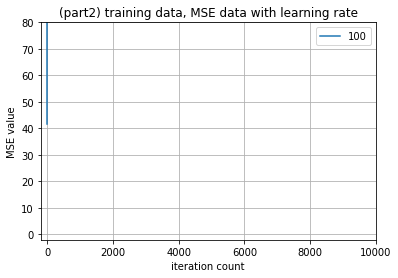

MSE of train data with learning rate 10 :  0.0  with iteration:  30


/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract


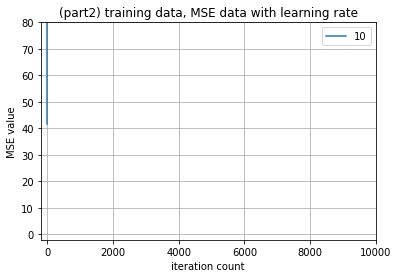

MSE of train data with learning rate 0.1 :  0.0  with iteration:  37


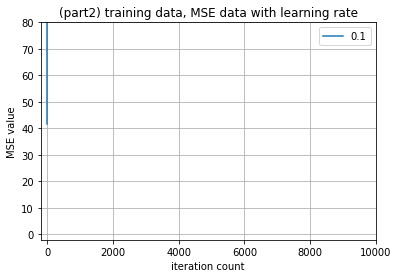

MSE of train data with learning rate 0.01 :  0.0  with iteration:  41


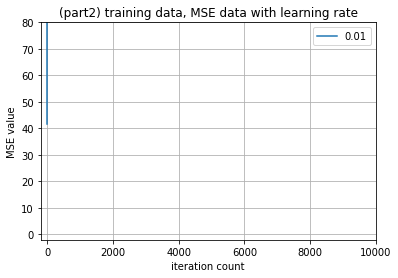

MSE of train data with learning rate 0.001 :  0.0  with iteration:  47


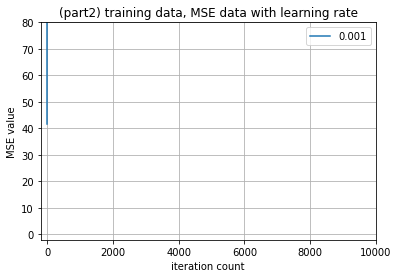

MSE of train data with learning rate 0.0001 :  0.0  with iteration:  55


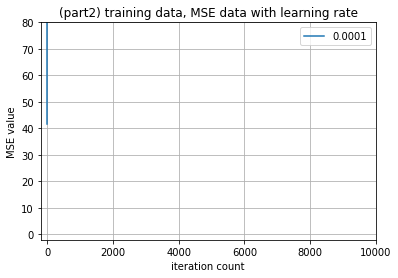

MSE of train data with learning rate 1e-05 :  0.0  with iteration:  66


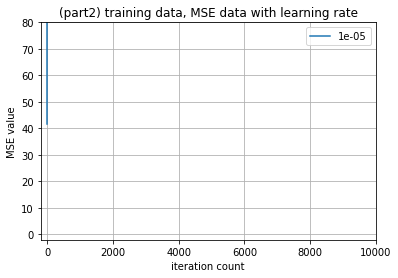

MSE of train data with learning rate 1e-07 :  0.0  with iteration:  112


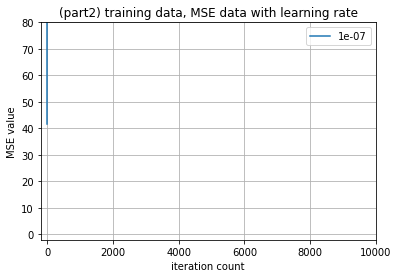

MSE of train data with learning rate 1e-09 :  0.0  with iteration:  477


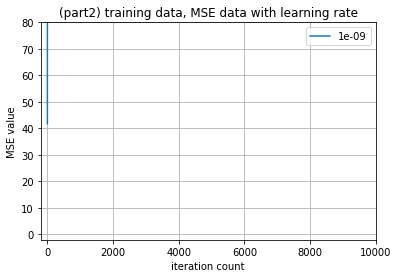

MSE of train data with learning rate 1e-10 :  6.608384736412362  with iteration:  10000


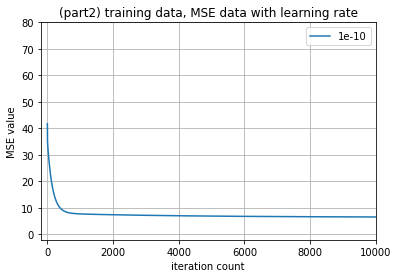

MSE of train data with learning rate 1e-11 :  7.761259256047734  with iteration:  10000


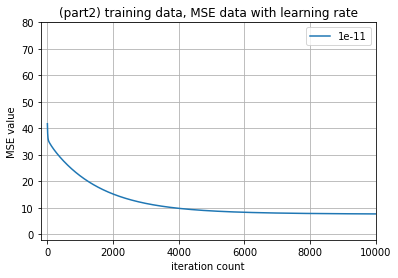

MSE of train data with learning rate 1e-12 :  22.102656601676216  with iteration:  10000


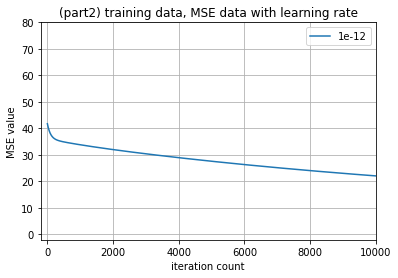

In [10]:
for i in range(len(learning_rate)):
  mse_norms, losses, itr_cnt, elapsed, weights = learning(df_train_trial, df_train_target, learning_rate[i], 10000)
  cur_mse_train = MSE(weights, df_train_trial, df_train_target);
  print('MSE of train data with learning rate ' + str(learning_rate[i]) + " : ", cur_mse_train, " with iteration: ", itr_cnt);
  
  
  plt.plot(losses, label=str(learning_rate[i]));
  plt.legend();
  plt.ylim(-2, 80)
  plt.xlim(-200, 10000)
  plt.xlabel('iteration count')
  plt.ylabel('MSE value')
  plt.grid(True)
  plt.title('(part2) training data, MSE data with learning rate')
  #plt.savefig(str(learning_rate[i])+"part2_training_.png", format='png')	
  plt.show()

plt.close();


MSE of validation data with learning rate 100 :  0.0  with iteration:  10000


/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in square


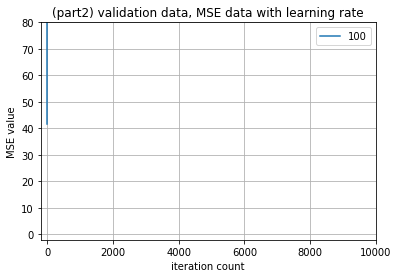

MSE of validation data with learning rate 10 :  0.0  with iteration:  10000


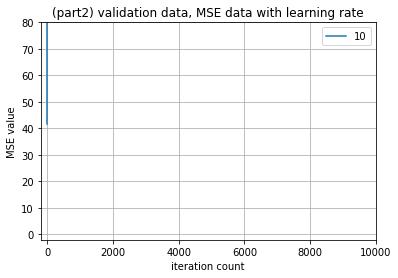

MSE of validation data with learning rate 0.1 :  0.0  with iteration:  10000


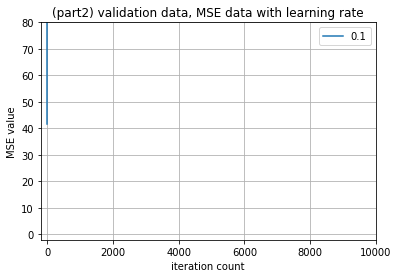

MSE of validation data with learning rate 0.01 :  0.0  with iteration:  10000


/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]


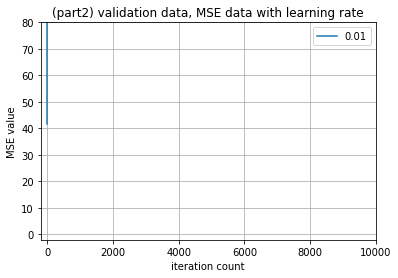

/nfs/stak/users/ohda/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract


MSE of validation data with learning rate 0.001 :  0.0  with iteration:  10000


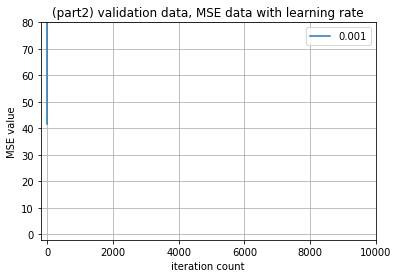

MSE of validation data with learning rate 0.0001 :  0.0  with iteration:  10000


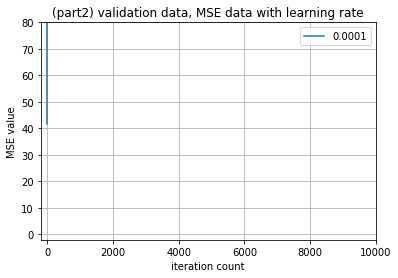

MSE of validation data with learning rate 1e-05 :  0.0  with iteration:  10000


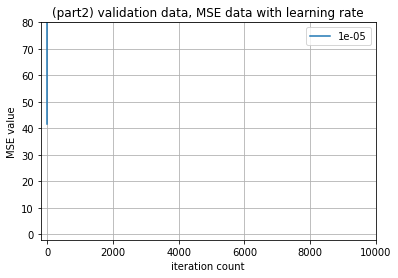

MSE of validation data with learning rate 1e-07 :  0.0  with iteration:  10000


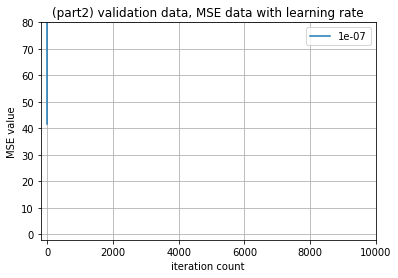

MSE of validation data with learning rate 1e-09 :  0.0  with iteration:  10000


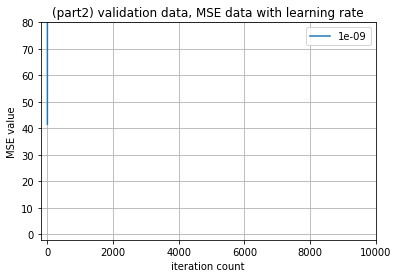

MSE of validation data with learning rate 1e-10 :  6.32221145872936  with iteration:  10000


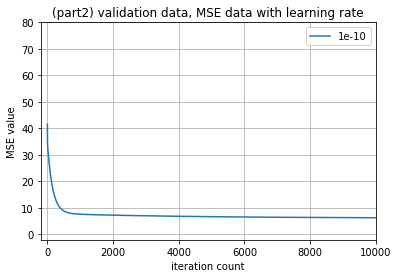

MSE of validation data with learning rate 1e-11 :  7.649587815003083  with iteration:  10000


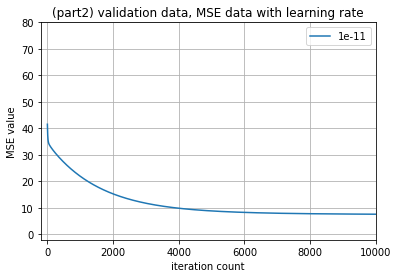

MSE of validation data with learning rate 1e-12 :  21.969163077208485  with iteration:  10000


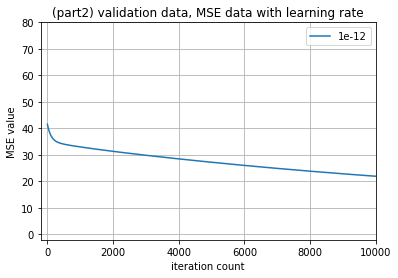

In [11]:
for i in range(len(learning_rate)):
  val_mse_norms, val_losses, val_itr_cnt, val_elapsed, val_weights = learning(df_dev_trial, df_dev_target, learning_rate[i], 10000)
  cur_mse_dev = MSE(val_weights, df_dev_trial, df_dev_target);
  print('MSE of validation data with learning rate ' + str(learning_rate[i]) + " : ", cur_mse_dev, " with iteration: ", itr_cnt);
  
  
  plt.plot(val_losses, label=str(learning_rate[i]));
  plt.legend();
  plt.ylim(-2, 80)
  plt.xlim(-200, 10000)
  plt.xlabel('iteration count')
  plt.ylabel('MSE value')
  plt.grid(True)
  plt.title('(part2) validation data, MSE data with learning rate')
  #plt.savefig(str(learning_rate[i])+"part2_validation_.png", format='png')	
  plt.show()